In [13]:
set.seed(1)
library(Seurat)
library(ggplot2)
library(patchwork)

In [14]:
outputs_folder = '../../outputs'

In [15]:
input_folder = file.path(outputs_folder, '/adatas', '/spatial_concatenated_01_for_R.h5')

In [16]:
adata = dior::read_h5(file=input_folder, target.object = 'seurat')

In [17]:
DefaultAssay(adata) <- "counts"
adata@assays$counts@key <- "rna_"

In [18]:
adata.list <- SplitObject(adata, split.by = "batch")

In [19]:


# normalize and identify variable features for each dataset independently
adata.list <- lapply(X = adata.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 500)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = adata.list)

In [20]:
immune.anchors <- FindIntegrationAnchors(object.list = adata.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 50386 anchors

Filtering anchors

	Retained 7693 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 43135 anchors

Filtering anchors

	Retained 8062 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 50929 anchors

Filtering anchors

	Retained 10063 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 57653 anchors

Filtering anchors

	Retained 7533 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 69874 anchors

Filtering anchors

	Retained 6038 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 56009 anchors

Filtering anchors

	Retained 4225 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 54573 anchors

Filtering anchors

	Retained

In [21]:
immune.combined <- IntegrateData(anchorset = immune.anchors)

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 2 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 3 1 into 4 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [22]:
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:15, neighbors =30L, min.dist = 0.01)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

15:21:20 UMAP embedding parameters a = 1.896 b = 0.8006

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

15:21:20 Read 128432 rows and found 15 numeric columns

15:21:20 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

15:21:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:21:28 Writing NN index file to temp file /tmp/RtmpDDJUaw/file3fb6495311cacf

15:21:28 Searching Annoy index using 1 thread, search_k = 3000

15:22:05 Annoy recall = 100%

15:22:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:22:09 Initializing from normalized Laplacian

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 128432
Number of edges: 3750315

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8790
Number of communities: 26
Elapsed time: 37 seconds


10 singletons identified. 16 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



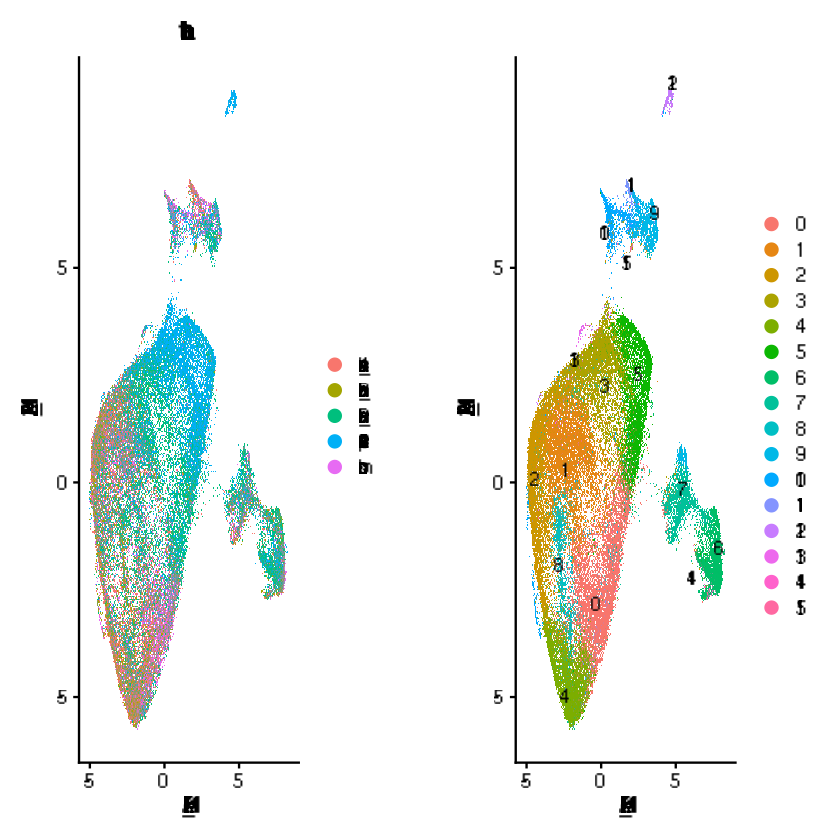

In [23]:
p1 <- DimPlot(immune.combined, reduction = "umap", group.by = "batch", pt.size = 1)
p2 <- DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1)
p1 + p2

In [24]:
saveRDS(immune.combined, file.path(outputs_folder, 'adatas', 'combined_spatial_seurat.rds'))